In [1]:
import graph_tool_extras as gte
import pandas as pd
import csv
import netpixi
from graph_tool import draw
from graph_tool import centrality
import cpnet
from itertools import combinations


In [2]:
PATH = 'sports-political-donations.csv'

In [3]:
data = pd.read_csv(PATH)

In [4]:
data.head()


,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat


In [5]:
with open(PATH) as file:

    # Ignora a primeira linha, pois ela é o cabeçalho.
    file.readline()

    # Armazena as linhas seguintes como lista de strings.
    lines = file.readlines()

In [6]:
for line in lines[:5]:
    print(line)

Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000 ",2016,Democrat

Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800 ",2020,Democrat

Adam Silver,Commissioner,NBA,CORY 2020,"$2,700 ",2020,Democrat

Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700 ",2020,Democrat

Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700 ",2020,Democrat



In [7]:
# Para não sobrecarregar este notebook, vamos usar um
# slice para imprimir apenas as cinco primeiras linhas.
for line in lines[:5]:

    # Separa a linha em partes, usando
    # o caractere ',' como separador.
    parts = line.split(',')

    # Ignora o primeiro e último caracteres
    # de cada parte, para eliminar as aspas.

    # Imprime o time, a campanha e o ano da campanha
    print(parts[1], parts[3], parts[6])

Commissioner WRIGHT 2016 2016
Commissioner BIDEN FOR PRESIDENT 2020
Commissioner CORY 2020 2020
Commissioner Kamala Harris for the People 2020
Commissioner Win The Era PAC 2020


In [8]:
with open(PATH) as file:
    reader = csv.reader(file)

    # Para não sobrecarregar este notebook, vamos usar um contador
    # e um break para imprimir apenas as cinco primeiras linhas.
    i = 0

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(reader)

    time = []
    campanha = []
    dic = {}

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    for line in reader:

        # Imprime o time, campanha e ano
        time1 = line[1]
        time.append(line[1])
        campanha.append(line[3] + line[5])
        campanha1 = line[3] + line[5]

        if campanha1.lower() not in dic:
            dic[campanha1.lower()] = []
        if time not in dic[campanha1.lower()]:
            
            dic[campanha1.lower()].append(time1)

        

        

        # Para não sobrecarregar este notebook, vamos usar um contador
        # e um break para imprimir apenas as cinco primeiras linhas.
        i += 1


In [9]:
g = gte.Graph(directed=False)
time = list(set(time))
for i in time:
  g.add_vertex_by_id(i)  
    

In [10]:
for campanha, time in dic.items():
    for i in range(len(time)):
        for j in range(i+1, len(time)):
            g.add_edge_by_ids(time[i], time[j])

    
       

In [11]:
layout = draw.sfdp_layout(g)
gte.move(g, layout)
gte.save(g, 'grafo.net.gz')


In [18]:
r = netpixi.render('grafo.net.gz');

In [19]:
r.vertex_set_key('id')

In [20]:
print("Número de vertices: {0}".format(g.num_vertices()))
print("Número de arestas: {0}".format(g.num_edges()))


Número de vertices: 115
Número de arestas: 4680


In [21]:
r.vertex_default(
    size=5,         # tamanho            (padrão: 16)
    color=0xffffff,  # cor                (padrão: 0xffffff)
    bwidth=1,        # espessura da borda (padrão: 2)
    bcolor=0x3f3f3f, # cor da borda       (padrão: 0x3f3f3f)
)

r.edge_default(
    width=0.3,        # espessura         (padrão: 2)
    color=0xffffff, # cor               (padrão: 0xffffff)
    curve1=0,       # curvatura inicial (padrão: 0)
    curve2=0,       # curvatura final   (padrão: 0)
)

In [34]:
g = gte.load('grafo.net.gz')

c = gte.total_degree(g)

g.add_vp('degree', c)

gte.save(g, 'degree.net.gz')

r = netpixi.render('degree.net.gz')


In [35]:
r.vertex_scale('degree', 10, 30)
import numpy as np

top5_indices = np.argsort(c.a)[-5:][::-1]

print("Os 5 vértices mais influentes:")
for idx in top5_indices:
    vertice = g.vertex(idx)
    nome_vertice = g.vp['id'][vertice]
    print(f"Vértice {idx} - Nome: {nome_vertice} - Degree: {c.a[idx]}")

Os 5 vértices mais influentes:
Vértice 6 - Nome: Cleveland Browns - Degree: 3.543859649122807
Vértice 96 - Nome: Tampa Bay Buccaneers - Degree: 3.3859649122807016
Vértice 114 - Nome: San Francisco Giants - Degree: 3.2280701754385963
Vértice 98 - Nome: Philadelphia 76ers, New Jersey Devils - Degree: 3.0701754385964914
Vértice 16 - Nome: Cincinnati Reds - Degree: 3.06140350877193


In [24]:
r.edge_default(
    width=0.3,        # espessura         (padrão: 2)
    color=0xffffff, # cor               (padrão: 0xffffff)
    curve1=0,       # curvatura inicial (padrão: 0)
    curve2=0,       # curvatura final   (padrão: 0)
)

In [36]:
g = gte.load('grafo.net.gz')

# Na verdade, o método devolve duas propriedades,
# mas estamos interessados apenas na primeira.
c, _ = centrality.betweenness(g)

g.add_vp('betweenness', c)

gte.save(g, 'betweenness.net.gz')

r = netpixi.render('betweenness.net.gz')

In [38]:
r.vertex_scale('betweenness', 10, 30)
import numpy as np
top5_indices = np.argsort(c.a)[-5:][::-1]

print("Os 5 vértices mais influentes:")
for idx in top5_indices:
    vertice = g.vertex(idx)
    nome_vertice = g.vp['id'][vertice]
    print(f"Vértice {idx} - Nome: {nome_vertice} - Betweenness: {c.a[idx]}")

Os 5 vértices mais influentes:
Vértice 6 - Nome: Cleveland Browns - Betweenness: 0.08683552566408971
Vértice 98 - Nome: Philadelphia 76ers, New Jersey Devils - Betweenness: 0.038726992503803764
Vértice 114 - Nome: San Francisco Giants - Betweenness: 0.03842967893276129
Vértice 96 - Nome: Tampa Bay Buccaneers - Betweenness: 0.037638645829266563
Vértice 16 - Nome: Cincinnati Reds - Betweenness: 0.03614719946811784


In [39]:
g = gte.load('grafo.net.gz')

# O parâmetro harmonic=True é necessário para garantir
# que a fórmula seja exatamente a definida acima.
c = centrality.closeness(g, harmonic=True)

g.add_vp('closeness', c)

gte.save(g, 'closeness.net.gz')

r = netpixi.render('closeness.net.gz')



In [40]:
r.vertex_scale('closeness', 10, 30)
import numpy as np

# Ordena os índices dos vértices de acordo com a centralidade closeness (maior para menor)
top5_indices = np.argsort(c.a)[-5:][::-1]

print("Os 5 vértices mais influentes:")
for idx in top5_indices:
    vertice = g.vertex(idx)
    nome_vertice = g.vp['id'][vertice]
    print(f"Vértice {idx} - Nome: {nome_vertice} - Closeness: {c.a[idx]}")


Os 5 vértices mais influentes:
Vértice 6 - Nome: Cleveland Browns - Closeness: 0.8245614035087719
Vértice 98 - Nome: Philadelphia 76ers, New Jersey Devils - Closeness: 0.7763157894736842
Vértice 59 - Nome: Chicago Cubs - Closeness: 0.7675438596491229
Vértice 108 - Nome: Portland Trail Blazers, Seattle Seahawks - Closeness: 0.7573099415204678
Vértice 15 - Nome: Miami Heat - Closeness: 0.7543859649122807


In [41]:
g = gte.load('grafo.net.gz')

c = gte.burt_constraint(g)

g.add_vp('burt_constraint', c)

gte.save(g, 'structural_holes.net.gz')

r = netpixi.render('structural_holes.net.gz')

In [42]:
r.vertex_scale('burt_constraint', 10, 30)

import numpy as np

top5_indices = np.argsort(c.a)[-5:][::-1]

print("Os 5 vértices mais influentes:")
for idx in top5_indices:
    vertice = g.vertex(idx)
    nome_vertice = g.vp['id'][vertice]
    print(f"Vértice {idx} - Nome: {nome_vertice} - Centralidade: {c.a[idx]}")


Os 5 vértices mais influentes:
Vértice 14 - Nome: New York Mets - Centralidade: 4.605875848849776
Vértice 16 - Nome: Cincinnati Reds - Centralidade: 3.531905691028808
Vértice 96 - Nome: Tampa Bay Buccaneers - Centralidade: 3.480369407167658
Vértice 54 - Nome: Orlando Magic - Centralidade: 3.1258806485996073
Vértice 37 - Nome: St. Louis Cardinals - Centralidade: 2.909919415373493


In [66]:
g = gte.load('grafo.net.gz')

"""c, l = gte.coreness(g, cpnet.Surprise)

g.add_converted_vp('color', c, lambda coreness: 0x00ff00 if round(coreness) == 1 else 0xff0000)

gte.save(g, 'coreness.net.gz')

netpixi.render('coreness.net.gz');"""

"c, l = gte.coreness(g, cpnet.Surprise)\n\ng.add_converted_vp('color', c, lambda coreness: 0x00ff00 if round(coreness) == 1 else 0xff0000)\n\ngte.save(g, 'coreness.net.gz')\n\nnetpixi.render('coreness.net.gz');"

In [64]:
for i in range(5):
    print(c[i])

1.0
0.0
0.0
0.0
0.0


In [65]:
for i in range(5):
    print(l[i])

0
0
0
0
0


In [87]:
"""c, l = gte.coreness(g, cpnet.Rombach)

for i in range(5):
    print(c[i])

g.add_vp('coreness', c)

gte.save(g, 'coreness.net.gz')

r = netpixi.render('coreness.net.gz')"""



"c, l = gte.coreness(g, cpnet.Rombach)\n\nfor i in range(5):\n    print(c[i])\n\ng.add_vp('coreness', c)\n\ngte.save(g, 'coreness.net.gz')\n\nr = netpixi.render('coreness.net.gz')"

In [86]:
r.vertex_scale('coreness', 5, 50)
r.vertex_set_key('id')

In [73]:
# Constrói um novo grafo.
from random import random
g = gte.Graph()

# Adiciona mil vértices ao grafo.
for id in range(1000):
    g.add_vertex_by_id(id)

# Para cada par de vértices...
for u, v in combinations(g.vertices(), 2):

    # ...com probabilidade de 50%...
    if random() < 0.5:

        # ...adiciona uma aresta entre eles.
        g.add_edge_by_ids(u.id(), v.id())



In [74]:
degrees = g.get_total_degrees()

In [75]:
degrees.describe()

count    1000.000000
mean      499.172000
std        16.025643
min       442.000000
25%       489.000000
50%       499.000000
75%       510.000000
max       549.000000
dtype: float64

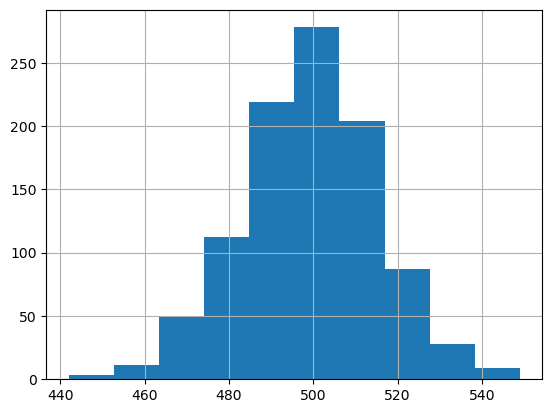

In [76]:
degrees.hist();

In [78]:
import distribution as dst
dst.not_normal(degrees)

np.float64(0.18697106669382257)

In [79]:
netpixi.render('grafo.net.gz');

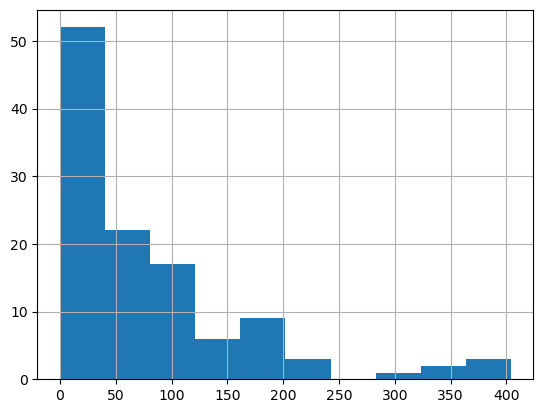

In [80]:
g = gte.load('grafo.net.gz')

degrees = g.get_total_degrees()

degrees.hist();

In [81]:
dst.not_normal(degrees)

np.float64(2.8200608227901915e-12)

In [82]:
dst.more_powerlaw_than_lognormal(degrees)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/opt/miniconda/envs/jupyterlab/lib/python3.13/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


(np.False_, np.float64(0.1533236504431097))

In [83]:
dst.more_powerlaw_than_exponential(degrees)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


(np.False_, np.float64(0.2697506540685165))